PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


c:\Users\supakron\OneDrive - Chitralada Technology Institute\Desktop\pro com\project final\Final-project-kong\climate-project-app\climate-project-app\src\Python\candex.py:245: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
c:\Users\supakron\OneDrive - Chitralada Technology Institute\Desktop\pro com\project final\Final-project-kong\climate-project-app\climate-project-app\src\Python\candex.py:249: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area


     idx1  idx2
0       0   394
1       0   412
2       0   392
3       0   393
4       0   410
..    ...   ...
783    76   392
784    76   393
785    76   409
786    76   410
787    76   411

[788 rows x 2 columns]


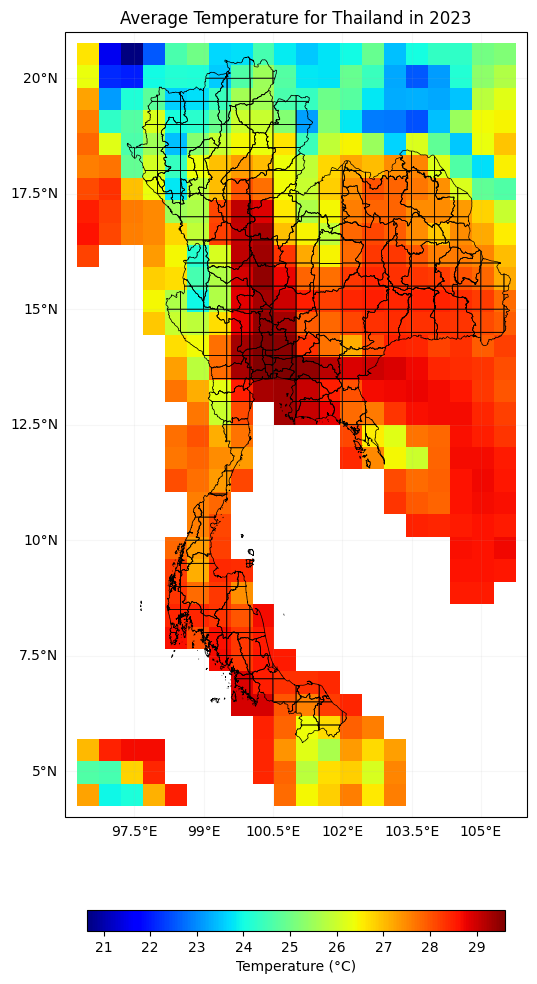

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from shapely.geometry import box
from dbfread import DBF
import candex

# โหลดข้อมูล NetCDF และจัดการข้อมูล
if __name__ == '__main__':
    ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
    data_var = ds.metpy.parse_cf('tmp')

    # แปลงคอลัมน์ 'time' ให้เป็นวันที่
    ds['time'] = pd.to_datetime(ds['time'].values)
    data_filtered = ds.sel(time=slice('2022-01-01', '2023-12-31'))

    # สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    year = 2023
    temp = data_filtered.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    data_avg = temp['tmp'].mean(dim='time')
    x = temp.lon
    y = temp.lat
    ax = axs
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')
    
    # ตั้งค่าแสดงผลของพิกัดในประเทศไทย
    ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())
    plt.title('Average Temperature for Thailand in ' + str(year), fontsize=12)

    # โหลด shapefiles
    shp_target = gpd.read_file('../shapefile/gadm41_THA_1.shp')
    shp_source = gpd.read_file('../shapefile/ThailandGrid.shp')
    shp_source = shp_source.set_crs("EPSG:4326")

    # คำนวณการตัดกัน (intersection) ระหว่าง shapefiles
    shp_int = candex.intersection_shp(shp_target, shp_source)
    shp_int = shp_int[['geometry']]

    # วาดขอบเขตของ shapefile
    shp_int.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

    # ตั้งค่า gridlines และ color bar
    gl = ax.gridlines(draw_labels=True, alpha=0.1)
    gl.top_labels = False
    gl.right_labels = False
    cbar = fig.colorbar(mp, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, shrink=0.3)
    cbar.set_label('Temperature (°C)')

    

    plt.show()


In [2]:
# cell 1: read candex function and load the paraemters
from climate import *
import matplotlib
import numpy as np
import geopandas as gpd



# cell 2: specifiying the parameter for creating the source shapefile
# name of the sample nc file (give only one if there are separaete file for each year or month)
name_of_nc = '../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc'
# sample varibale from nc file (similar to all the dimensions for all the varibales with intend to read)
name_of_variable = 'tmp' 
# name of varibale in nc file (and not dimension) that holed the longituge values
name_of_lon_var = 'lon' 
# name of varibale in nc file (and not dimension) that holds the latitiute values
name_of_lat_var = 'lat'
# bounding box the trim the created shepefile
# it should be in form of np.array([min_lat,max_lat,min_lon,max_lon]) 
# or should be give False if there is not box
box_values =  np.array([5,21,97,106]) # or False;
# if the nc file lon is 0 to 360 and want to transfor to -180 to 180
# in the case the box_value should be in either of east or west hemisphere
correct_360 = False
# name of the shapefile that is created and saved
name_of_shp = '../shapefile/ThailandGrid.shp' 
# creating the shapefile and preparing the 2D lat/lon field based on shapefile for indexing
lat_2D, lon_2D = candex.NetCDF_SHP_lat_lon(name_of_nc, name_of_variable, name_of_lat_var,
                                            name_of_lon_var, name_of_shp, box_values, correct_360)

# cell 3: plotting the created shapefile
shp_source = gpd.read_file('../shapefile/ThailandGrid.shp') # load it
print(shp_source.head()) # show the first 5 rows
# plotting
# shp_source.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 0.25, figsize=(20,20))
# matplotlib.pyplot.xlabel('Lon')
# matplotlib.pyplot.ylabel('Lat')
# matplotlib.pyplot.show()

case 1 - regular lat/lon
360 720
   ID_s  lat_s  lon_s                                           geometry
0   1.0   5.25  97.25  POLYGON ((97.25 5, 97.5 5, 97.5 5.25, 97.5 5.5...
1   2.0   5.25  97.75  POLYGON ((97.75 5, 98 5, 98 5.25, 98 5.5, 97.7...
2   3.0   5.25  98.25  POLYGON ((98.25 5, 98.5 5, 98.5 5.25, 98.5 5.5...
3   4.0   5.25  98.75  POLYGON ((98.75 5, 99 5, 99 5.25, 99 5.5, 98.7...
4   5.0   5.25  99.25  POLYGON ((99.25 5, 99.5 5, 99.5 5.25, 99.5 5.5...


In [3]:
# Load the .dbf file and convert to DataFrame
remap_df = pd.DataFrame(iter(DBF('../shapefile/ThailandGrid.dbf')))

# สมมติว่า lat_2D และ lon_2D เป็นข้อมูล 2D array ของละติจูดและลองจิจูดในไฟล์ .nc
# คำนวณตำแหน่ง rows และ cols ของ source lat/lon ในไฟล์ .nc
rows, cols = candex.lat_lon_to_index(np.array(remap_df['lat_s']),
                                     np.array(remap_df['lon_s']),
                                     lat_2D,
                                     lon_2D)

# เพิ่มคอลัมน์ 'rows' และ 'cols' ลงใน remap_df
remap_df['rows'] = rows
remap_df['cols'] = cols

# บันทึก remap_df เป็น CSV สำหรับการใช้งานในอนาคต
# remap_df.to_csv('../shapefile/remap-ThailandGrid.csv', index=False)

In [4]:
# # remapping
# # remap csv
# remap_df = pd.read_csv('../shapefile/remap-ThailandGrid.csv')

# # element of nc file

# nc_names = '../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc' # if there are multiple nc file can be pecify by *
# output_path = '../dataset-nc/remap-test' # the path 
# name_of_var_time = 'time' # dimension of time in the source nc files
# name_of_vars = ['tmp'] #varibale that need to be remapped
# # format of the varibales
# format_of_vars = ['f4','f4'] # type of the varibale that need to be remapped f4 single, f8 double, int, integer
# fill_values = ['-9999.00','-9999.00'] # Fill values for each varibale
# authour_name = 'Supakron sukphithak test-1' # the authour

# # candex target_nc_creation functions
# candex.target_nc_creation(nc_names,
#                    remap_df,
#                    name_of_var_time,
#                    output_path,
#                    name_of_vars,
#                    format_of_vars,
#                    fill_values,
#                    authour_name)




<xarray.Dataset> Size: 8GB
Dimensions:  (lon: 720, lat: 360, time: 1476)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2023-12-16
Data variables:
    tmp      (time, lat, lon) float32 2GB ...
    stn      (time, lat, lon) float64 3GB ...
    mae      (time, lat, lon) float32 2GB ...
    maea     (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.08 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2406270035. Data generated from:tmp.2406262226.dtb
    history:      Thu 27 Jun 01:31:07 BST 2024 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user

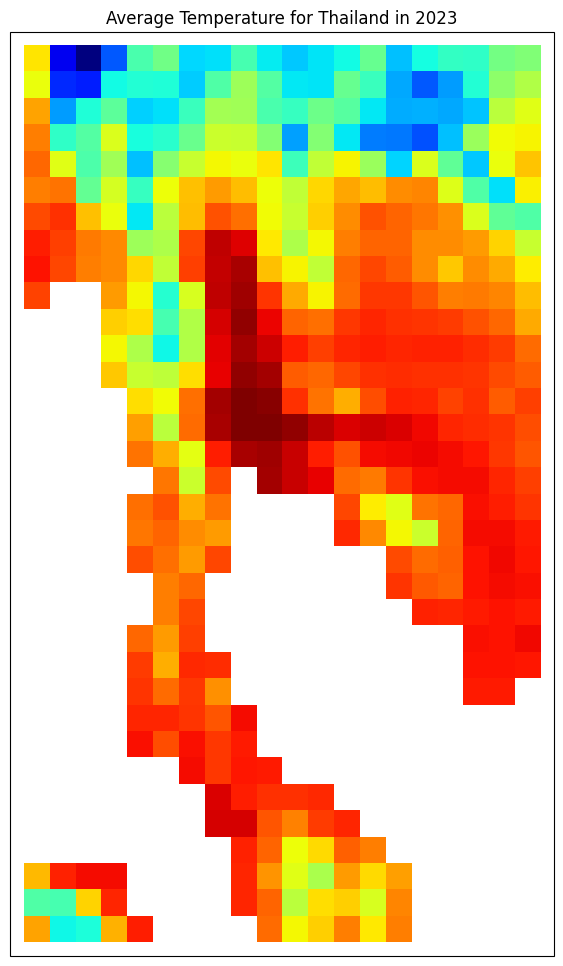

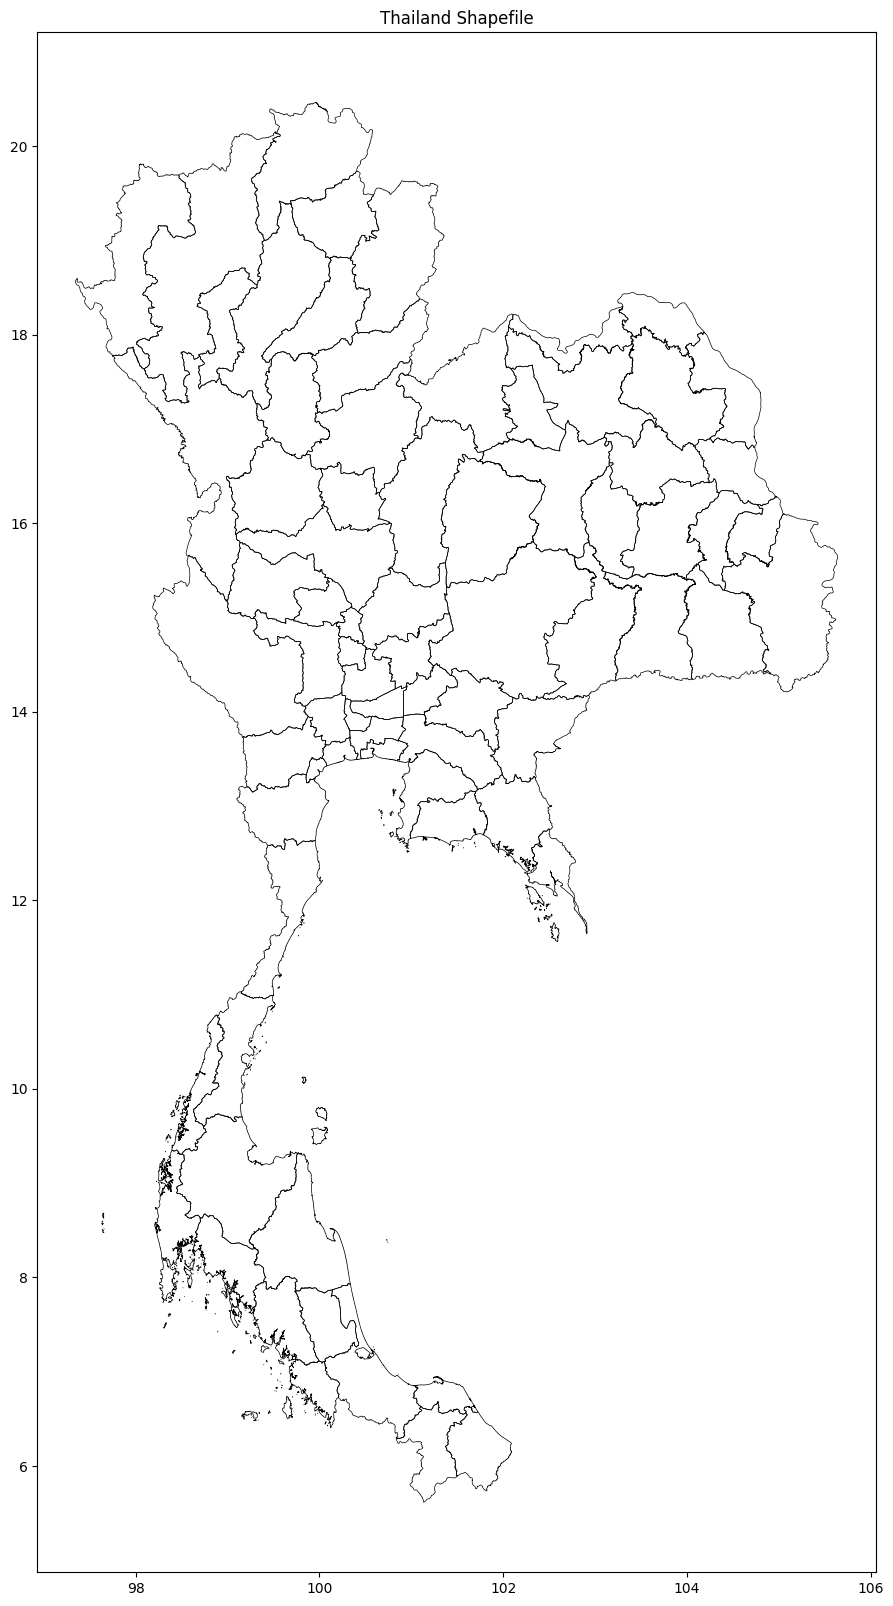

In [5]:
# load the nc file
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
data_var = ds.metpy.parse_cf('tmp')


# แปลงคอลัมน์ 'time' ให้เป็นวันที่
ds['time'] = pd.to_datetime(ds['time'].values)
data_filtered = ds.sel(time=slice('2022-01-01', '2023-12-31'))

print(ds)

# สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
year = 2023
temp = data_filtered.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
data_avg = temp['tmp'].mean(dim='time')
x = temp.lon
y = temp.lat
ax = axs
mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')


    
# ตั้งค่าแสดงผลของพิกัดในประเทศไทย
ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())
plt.title('Average Temperature for Thailand in ' + str(year), fontsize=12)
plt.show()

gdf = gpd.read_file("../shapefile/gadm41_THA_1.shp")
gdf.geometry.boundary.plot( color=None,edgecolor='k',linewidth = 0.5, figsize=(20,20))
plt.title("Thailand Shapefile")
plt.show()

c:\Users\supakron\OneDrive - Chitralada Technology Institute\Desktop\pro com\project final\Final-project-kong\climate-project-app\climate-project-app\src\Python\candex.py:245: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
c:\Users\supakron\OneDrive - Chitralada Technology Institute\Desktop\pro com\project final\Final-project-kong\climate-project-app\climate-project-app\src\Python\candex.py:249: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area


     idx1  idx2
0       0   394
1       0   412
2       0   392
3       0   393
4       0   410
..    ...   ...
783    76   392
784    76   393
785    76   409
786    76   410
787    76   411

[788 rows x 2 columns]


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:2585: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type, sort=sort)


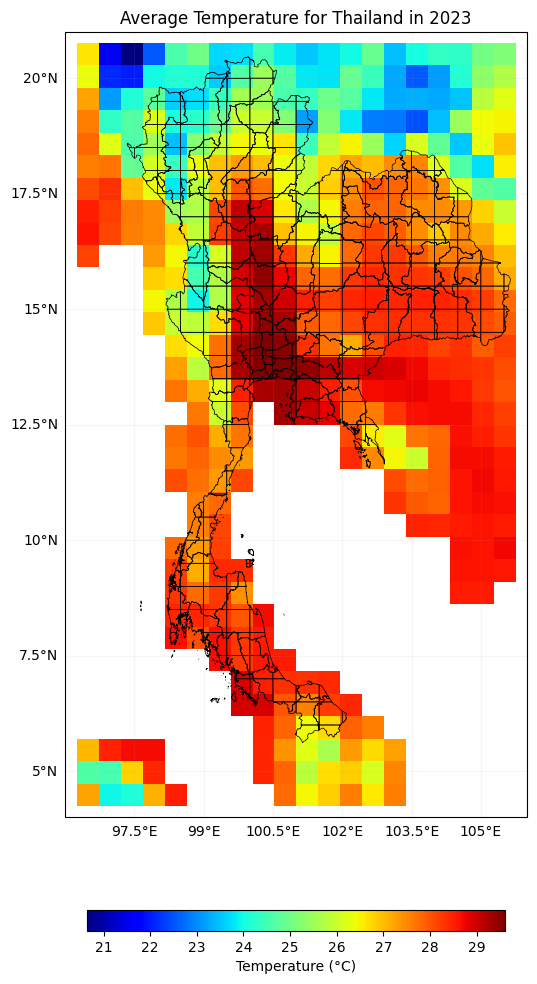

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from shapely.geometry import box
from dbfread import DBF
import candex

# โหลดข้อมูล NetCDF และจัดการข้อมูล
if __name__ == '__main__':
    ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
    data_var = ds.metpy.parse_cf('tmp')

    # แปลงคอลัมน์ 'time' ให้เป็นวันที่
    ds['time'] = pd.to_datetime(ds['time'].values)
    data_filtered = ds.sel(time=slice('2022-01-01', '2023-12-31'))

    # สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    year = 2023
    temp = data_filtered.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    data_avg = temp['tmp'].mean(dim='time')
    x = temp.lon
    y = temp.lat
    ax = axs
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')
    
    # ตั้งค่าแสดงผลของพิกัดในประเทศไทย
    ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())
    plt.title('Average Temperature for Thailand in ' + str(year), fontsize=12)

    # โหลด shapefiles
    shp_target = gpd.read_file('../shapefile/gadm41_THA_1.shp')
    shp_source = gpd.read_file('../shapefile/ThailandGrid.shp')
    shp_source = shp_source.set_crs("EPSG:4326")

    # คำนวณการตัดกัน (intersection) ระหว่าง shapefiles
    shp_int = candex.intersection_shp(shp_target, shp_source)
    shp_int = shp_int[['geometry']]

    # วาดขอบเขตของ shapefile
    shp_int_clip = shp_int.clip(shp_target)
    
    shp_int_clip.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

    # ตั้งค่า gridlines และ color bar
    gl = ax.gridlines(draw_labels=True, alpha=0.1)
    gl.top_labels = False
    gl.right_labels = False
    cbar = fig.colorbar(mp, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, shrink=0.3)
    cbar.set_label('Temperature (°C)')

    

    plt.show()


